In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor


df = pd.read_csv('Data/house_prices2.csv')

df

df = df.drop(['id', 'date'], axis=1)

In [3]:
print(df.isnull().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
duplicate_df = df[df.duplicated()]
print("Number of duplicate rows", duplicate_df.shape)

df = df.drop_duplicates()
print("Number of duplicate rows", duplicate_df.shape)


Number of duplicate rows (0, 19)
Number of duplicate rows (0, 19)


In [5]:
from sklearn.preprocessing import LabelEncoder

le_waterfront = LabelEncoder()
le_condition = LabelEncoder()

df['waterfront_en'] = le_waterfront.fit_transform(df['waterfront'])
df['condition_en'] = le_condition.fit_transform(df['condition'])

print(dict(enumerate(le_waterfront.classes_)))
print(dict(enumerate(le_condition.classes_)))


{0: 'N', 1: 'Y'}
{0: 'Average', 1: 'Fair', 2: 'Good', 3: 'Poor', 4: 'Very Good'}


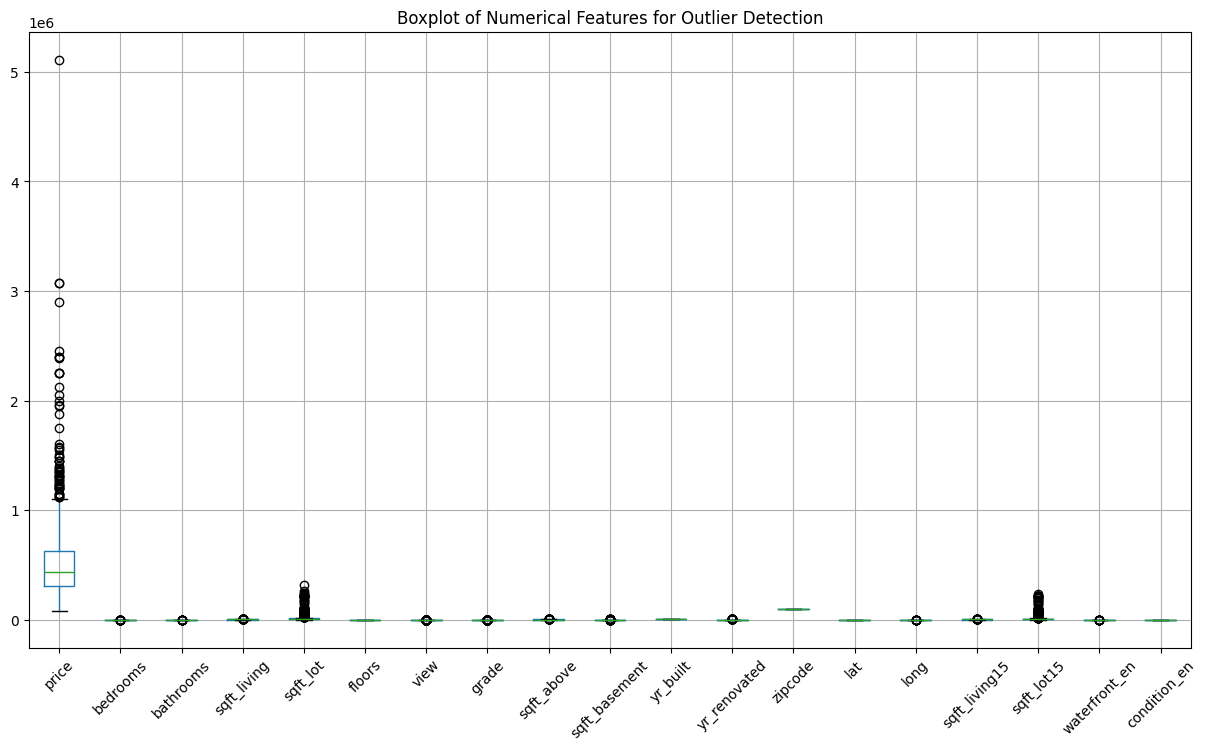

In [6]:
numerical_columns = ["pm2.5", "pm10", "no2", "so2", "co", "proximity_to_industrial_areas", "population_density", "air_quality"]

plt.figure(figsize=(15, 8))
df.boxplot(rot=45)
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()

In [7]:
df = df.drop(['waterfront', 'condition'], axis=1)

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_en,condition_en
0,221900,3,1.00,1180,5650,1.0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0
1,538000,3,2.25,2570,7242,2.0,0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,0
2,180000,2,1.00,770,10000,1.0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0
3,604000,4,3.00,1960,5000,1.0,0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,4
4,510000,3,2.00,1680,8080,1.0,0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,365000,4,2.50,1570,9600,1.0,0,7,800,770,1972,0,98155,47.7757,-122.303,1340,9110,0,0
1226,234000,3,1.50,1200,11935,1.0,0,7,1200,0,1968,0,98042,47.3434,-122.082,1350,11935,0,2
1227,211000,4,2.00,1710,8288,1.5,0,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200,0,0
1228,680000,6,3.50,3000,6320,2.0,2,8,2400,600,1969,0,98118,47.5620,-122.279,1720,6360,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1230 non-null   int64  
 1   bedrooms       1230 non-null   int64  
 2   bathrooms      1230 non-null   float64
 3   sqft_living    1230 non-null   int64  
 4   sqft_lot       1230 non-null   int64  
 5   floors         1230 non-null   float64
 6   view           1230 non-null   int64  
 7   grade          1230 non-null   int64  
 8   sqft_above     1230 non-null   int64  
 9   sqft_basement  1230 non-null   int64  
 10  yr_built       1230 non-null   int64  
 11  yr_renovated   1230 non-null   int64  
 12  zipcode        1230 non-null   int64  
 13  lat            1230 non-null   float64
 14  long           1230 non-null   float64
 15  sqft_living15  1230 non-null   int64  
 16  sqft_lot15     1230 non-null   int64  
 17  waterfront_en  1230 non-null   int64  
 18  conditio

In [9]:
import numpy as np
import pandas as pd

def remove_outliers_iqr(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns  # เลือกเฉพาะคอลัมน์ตัวเลข
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[~((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)]

    return df_cleaned

df_cleaned = remove_outliers_iqr(df)

original_size = df.shape[0]
cleaned_size = df_cleaned.shape[0]

original_size, cleaned_size


(1230, 850)

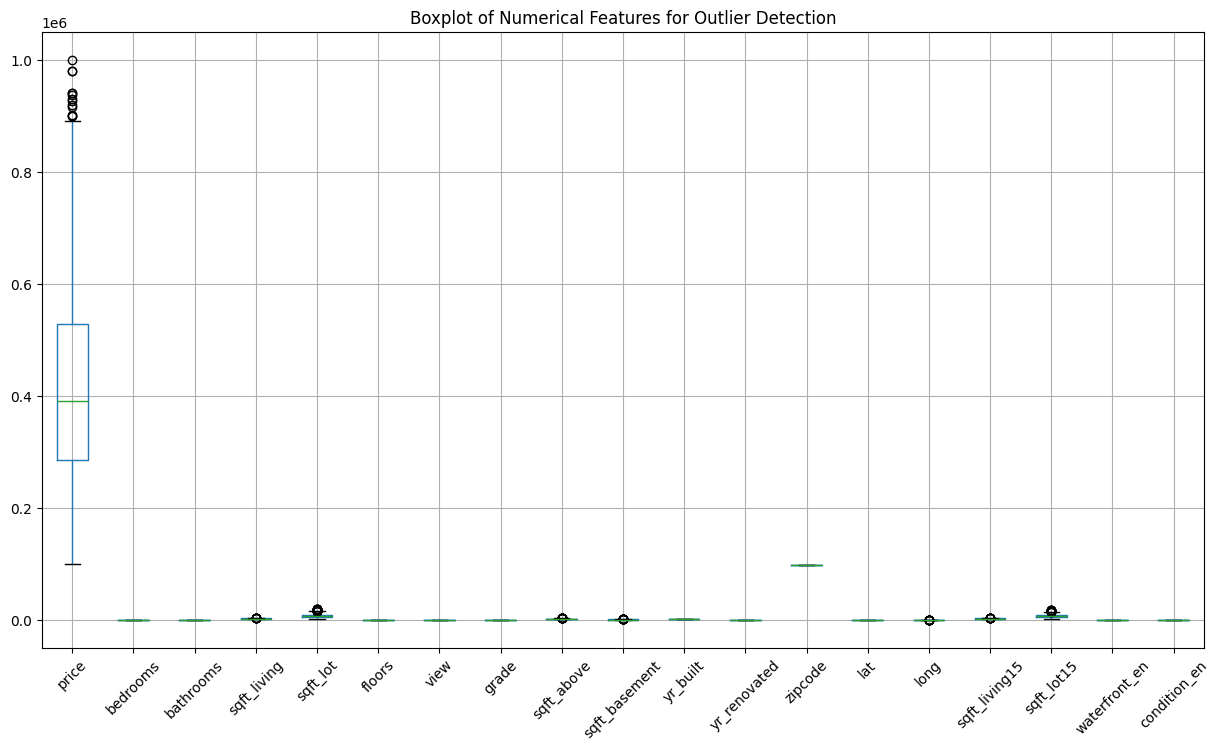

In [10]:
plt.figure(figsize=(15, 8))
df_cleaned.boxplot(rot=45)
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()

In [11]:
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_en,condition_en
0,221900,3,1.00,1180,5650,1.0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0
2,180000,2,1.00,770,10000,1.0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0
3,604000,4,3.00,1960,5000,1.0,0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,4
4,510000,3,2.00,1680,8080,1.0,0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0
6,257500,3,2.25,1715,6819,2.0,0,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,735000,4,2.50,2820,6180,2.0,0,9,2050,770,2013,0,98118,47.5529,-122.281,1390,4635,0,0
1225,365000,4,2.50,1570,9600,1.0,0,7,800,770,1972,0,98155,47.7757,-122.303,1340,9110,0,0
1226,234000,3,1.50,1200,11935,1.0,0,7,1200,0,1968,0,98042,47.3434,-122.082,1350,11935,0,2
1227,211000,4,2.00,1710,8288,1.5,0,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200,0,0


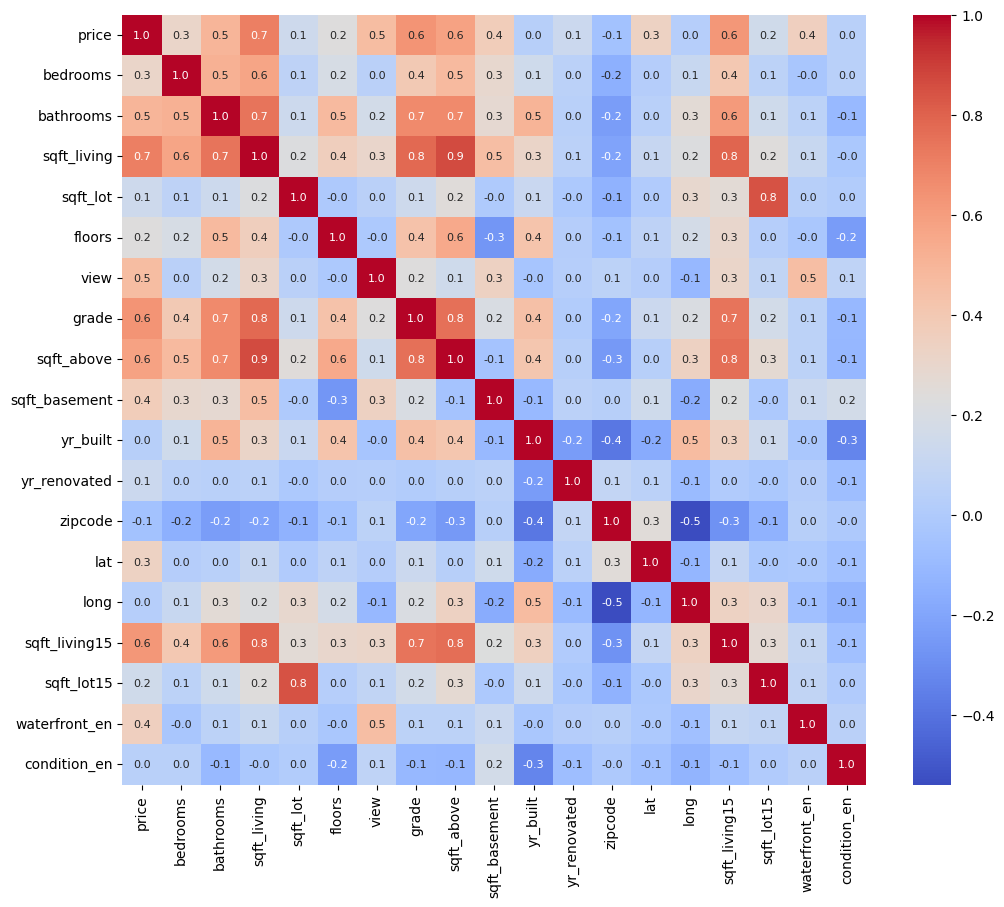

In [12]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".1f", annot_kws={"size": 8})
plt.show()

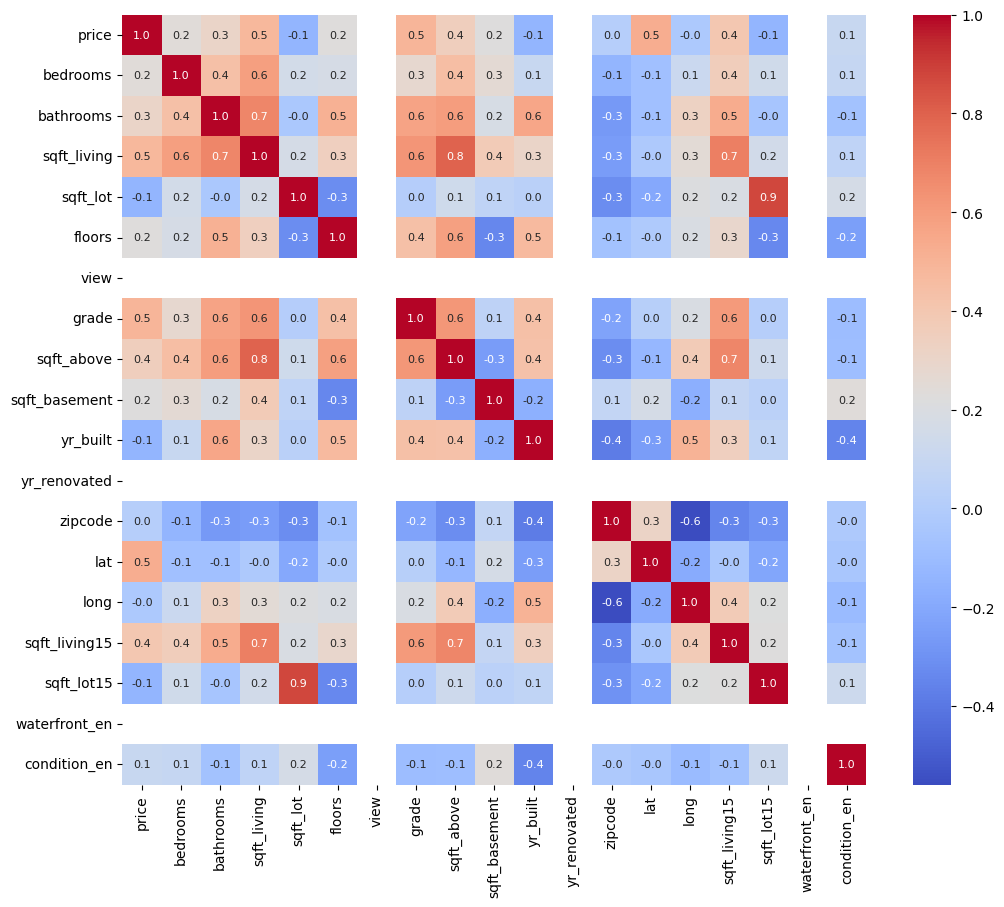

In [13]:
# Correlation matrix
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".1f", annot_kws={"size": 8})
plt.show()

In [14]:
#df['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'lat']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x1 = df_cleaned['sqft_living']
x2 = df_cleaned['grade']
X = np.column_stack((x1, x2))
y = df_cleaned['price']

X_scaled = scaler.fit_transform(X)

In [15]:
'''# ต้องโหลดไลบรารีใหม่หลังจาก state ถูก reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# ตั้งค่าตัวเรียนรู้แบบ SGD
sgd = SGDRegressor(max_iter=1, learning_rate='constant', eta0=1e-7, warm_start=True)

# เก็บค่าพารามิเตอร์ในแต่ละ epoch และสมการทุก ๆ 100 รอบ
m1_vals, m2_vals, mse_values, equations_sse = [], [], [], []

# กำหนดค่าเงื่อนไขการหยุด (Early Stopping)
tolerance = 1e-6
max_epochs = 200001

# เรียนรู้แบบ SGD ทีละรอบและบันทึกค่าพารามิเตอร์และ error
for epoch in range(max_epochs):  
    sgd.fit(X_scaled, y)
    m1, m2 = sgd.coef_
    c = sgd.intercept_[0]

    y_pred = sgd.predict(X_scaled)
    mse = np.mean((y - y_pred) ** 2)  # คำนวณค่า MSE

    m1_vals.append(m1)
    m2_vals.append(m2)
    mse_values.append(mse)

    if epoch % 20000 == 0:
        equations_sse.append(f"Epoch {epoch}: y = {m1:.4f}x1 + {m2:.4f}x2 + {c:.4f}, MSE = {mse:.4f}")
    # ตรวจสอบเงื่อนไขการหยุด (Early Stopping)
    if epoch > 0 and abs(mse_values[-1] - mse_values[-2]) < tolerance:
        print(f"Early stopping at epoch {epoch} with MSE {mse:.6f}")
        break

# Plot ค่า MSE ในแต่ละ epoch
plt.figure(figsize=(10, 5))
plt.plot(range(20001), mse_values, label="MSE over epochs", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE over Training Epochs")
plt.legend()
plt.show()

# แสดงสมการที่บันทึกไว้ทุก 100 epochs พร้อมค่า MSE
equations_sse
'''

'# ต้องโหลดไลบรารีใหม่หลังจาก state ถูก reset\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.linear_model import SGDRegressor\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n# ตั้งค่าตัวเรียนรู้แบบ SGD\nsgd = SGDRegressor(max_iter=1, learning_rate=\'constant\', eta0=1e-7, warm_start=True)\n\n# เก็บค่าพารามิเตอร์ในแต่ละ epoch และสมการทุก ๆ 100 รอบ\nm1_vals, m2_vals, mse_values, equations_sse = [], [], [], []\n\n# กำหนดค่าเงื่อนไขการหยุด (Early Stopping)\ntolerance = 1e-6\nmax_epochs = 200001\n\n# เรียนรู้แบบ SGD ทีละรอบและบันทึกค่าพารามิเตอร์และ error\nfor epoch in range(max_epochs):  \n    sgd.fit(X_scaled, y)\n    m1, m2 = sgd.coef_\n    c = sgd.intercept_[0]\n\n    y_pred = sgd.predict(X_scaled)\n    mse = np.mean((y - y_pred) ** 2)  # คำนวณค่า MSE\n\n    m1_vals.append(m1)\n    m2_vals.append(m2)\n    mse_values.append(mse)\n\n    if epoch % 20000 == 0:\n        equations_sse.append(f"Epoch {epoc

[0]	train-rmse:173218.77621
[20000]	train-rmse:107005.29519
[40000]	train-rmse:102622.54574
[60000]	train-rmse:101520.71484
[80000]	train-rmse:101257.93304
[100000]	train-rmse:101170.35173
[120000]	train-rmse:101149.38322
[132732]	train-rmse:101145.32971


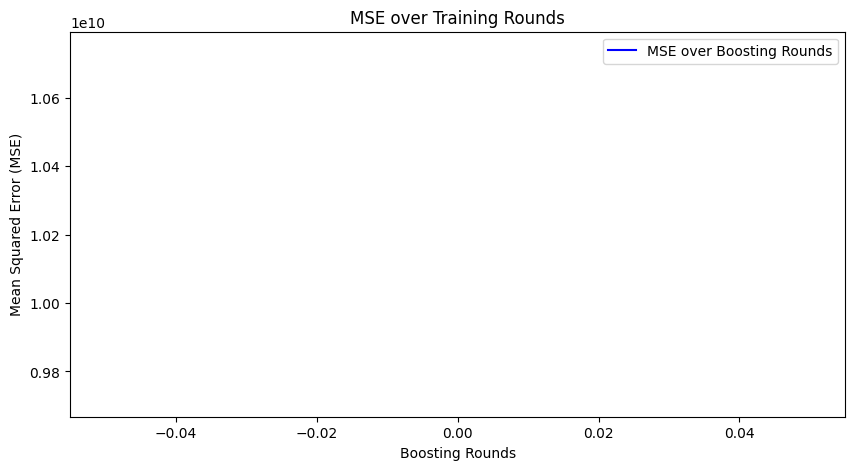

['Final Model: MSE = 10230378496.000000']

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# ทำการสเกลข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dmatrix = xgb.DMatrix(X_scaled, label=y)

# กำหนดพารามิเตอร์ของ XGBoost
params = {
    "objective": "reg:squarederror",
    "learning_rate": 1e-2,
    "max_depth": 3,
    "lambda": 1.0,
    "alpha": 0.0
}

num_boost_round = 200000
early_stopping_rounds = 10

# เก็บค่าพารามิเตอร์และค่า MSE
mse_values = []
equations_sse = []

# ฝึกโมเดล XGBoost
bst = xgb.train(
    params,
    dmatrix,
    num_boost_round=num_boost_round,
    evals=[(dmatrix, "train")],
    early_stopping_rounds=early_stopping_rounds,
    verbose_eval=20000
)

# ทำนายค่า
y_pred = bst.predict(dmatrix)

# คำนวณค่า MSE
mse = mean_squared_error(y, y_pred)
mse_values.append(mse)

equations_sse.append(f"Final Model: MSE = {mse:.6f}")

# Plot ค่า MSE
plt.figure(figsize=(10, 5))
plt.plot(range(len(mse_values)), mse_values, label="MSE over Boosting Rounds", color="blue")
plt.xlabel("Boosting Rounds")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE over Training Rounds")
plt.legend()
plt.show()

# แสดงสมการสุดท้าย
equations_sse


In [17]:
'''# กำหนดค่าตัวแปรตามที่ร้องขอ
x1 = df_cleaned['sqft_living']
x2 = df_cleaned['grade']
x3 = df_cleaned['sqft_above']
x4 = df_cleaned['sqft_living15']
x5 = df_cleaned['lat']
X = np.column_stack((x1, x2, x3, x4, x5))
y = df_cleaned['price']

# คำนวณค่าพยากรณ์
y_hat = 2.9651*x1 + 2.0169*x2 + 3.9714*x3 + 4.9900*x4 + 5.9449*x5 + 5.3598

mse_total = ((y - y_hat)**2)

df_result = pd.DataFrame({
    'sqft_living': x1.round(2),
    'grade': x2,
    'sqft_above': x3.round(2),
    'sqft_living15': x4.round(2),
    'lat': x5.round(2),
    'price_actual': y.round(2),
    'price_predicted': y_hat.round(2),a
    'MSE_total': round(mse_total, 2)
})

df_result'''

"# กำหนดค่าตัวแปรตามที่ร้องขอ\nx1 = df_cleaned['sqft_living']\nx2 = df_cleaned['grade']\nx3 = df_cleaned['sqft_above']\nx4 = df_cleaned['sqft_living15']\nx5 = df_cleaned['lat']\nX = np.column_stack((x1, x2, x3, x4, x5))\ny = df_cleaned['price']\n\n# คำนวณค่าพยากรณ์\ny_hat = 2.9651*x1 + 2.0169*x2 + 3.9714*x3 + 4.9900*x4 + 5.9449*x5 + 5.3598\n\nmse_total = ((y - y_hat)**2)\n\ndf_result = pd.DataFrame({\n    'sqft_living': x1.round(2),\n    'grade': x2,\n    'sqft_above': x3.round(2),\n    'sqft_living15': x4.round(2),\n    'lat': x5.round(2),\n    'price_actual': y.round(2),\n    'price_predicted': y_hat.round(2),a\n    'MSE_total': round(mse_total, 2)\n})\n\ndf_result"